## Tensorflow v2 Linear Regression
- https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/2_BasicModels/linear_regression.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import tensorflow as tf
import time

from IPython import display
from matplotlib import pyplot as plt

### Parameters

In [ ]:
learning_rate = 0.01
training_step = 1000
display_step = 50

### Data Preparation

In [ ]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

### Create Model

In [ ]:
# Model Parameter
W = tf.Variable(np.random.rand(), name='weight')
b = tf.Variable(np.random.rand(), name='bias')

In [ ]:
# Model
def linear_regression(x):
    return W * x + b

In [ ]:
# Loss -- Mean Square Error
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [ ]:
# Optimization
optimizer = tf.optimizers.Adam(learning_rate)

def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradient
    gradients = g.gradient(loss, [W, b])

    # Update
    optimizer.apply_gradients(zip(gradients, [W, b]))

### Train Model

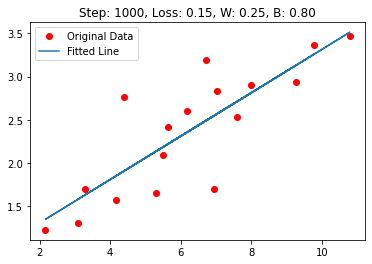

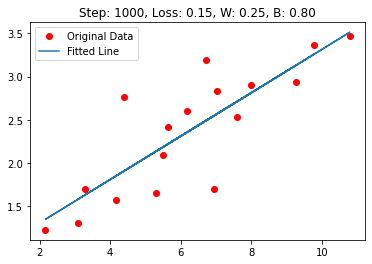

In [ ]:
fig, ax = plt.subplots(1, 1)

for step in range(1, training_step+1):
    run_optimization()

    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

        ax.clear()
        ax.set_title('Step: %d, Loss: %.2f, W: %.2f, B: %.2f' % (step, loss, W.numpy(), b.numpy()))
        ax.plot(X, Y, 'ro', label='Original Data')
        ax.plot(X, (W * X + b).numpy(), label='Fitted Line')
        ax.legend()

        display.clear_output(wait=True) 
        display.display(fig)
        time.sleep(0.5)        